In [20]:
import json
from collections import defaultdict
import re
# Load the JSON files
with open("../workspace_data/similarity_scores_gearnet_gemma2.json", "r") as file1, \
     open("../workspace_data/similarity_scores_gvp_gemma2.json", "r") as file2, \
     open("../workspace_data/similarity_scores_scannet_gemma2.json", "r") as file3, \
     open("../workspace_data/similarity_scores_gat_gemma2.json", "r") as file4:
    gearnet_data = json.load(file1)
    gvp_data = json.load(file2)
    scannet_data = json.load(file3)
    gat_data = json.load(file4)

# Step 1: Find common proteins across all files
common_proteins = set(gearnet_data.keys()) & set(gvp_data.keys()) & set(scannet_data.keys()) & set(gat_data.keys())

# Step 2: Calculate the average similarity score for each common protein
average_scores = {}
for protein in common_proteins:
    avg_score = (
        gearnet_data[protein]["similarity_score"] +
        gvp_data[protein]["similarity_score"] +
        scannet_data[protein]["similarity_score"] +
        gat_data[protein]["similarity_score"]
    ) / 4
    average_scores[protein] = avg_score

# Step 3: Rank the proteins by their average similarity score in increasing order
sorted_proteins = sorted(average_scores.items(), key=lambda x: x[1])
lowest_protein = []
higest_protein = []

for protein, score in sorted_proteins[:50]:
    lowest_protein.append(protein)
    print(f"low protein: {protein}, score: {score}")

for protein, score in sorted_proteins[-50:]:
    higest_protein.append(protein)
    print(f"high protein: {protein}, score: {score}")


low protein: 1NVI, score: -0.25298865884542465
low protein: 3LOV, score: -0.24685213342308998
low protein: 4GGC, score: -0.1968759521842003
low protein: 3AJF, score: -0.15736731328070164
low protein: 1IMV, score: -0.1568189449608326
low protein: 1Y8O, score: -0.13970477669499815
low protein: 2UYK, score: -0.1379271000623703
low protein: 4FCM, score: -0.13434183597564697
low protein: 4U5Y, score: -0.12642508000135422
low protein: 3POS, score: -0.12139052897691727
low protein: 3PQS, score: -0.09270419110544026
low protein: 3MGC, score: -0.0919308140873909
low protein: 2XMR, score: -0.08472252357751131
low protein: 5A68, score: -0.08051024004817009
low protein: 2OLA, score: -0.08025404438376427
low protein: 4J77, score: -0.07648274302482605
low protein: 3CHV, score: -0.06427067797631025
low protein: 4WDE, score: -0.04654848575592041
low protein: 4HI4, score: -0.04548768326640129
low protein: 2GRM, score: -0.04424343816936016
low protein: 2SEM, score: -0.04273651912808418
low protein: 3S0T

In [21]:
import os
import re
from collections import defaultdict
fasta_folder = "content/protein_files/fasta"

category = defaultdict(list)
count = 0
for fasta_file in os.listdir(fasta_folder):
    if fasta_file.endswith(".fasta"):
        file_path = os.path.join(fasta_folder, fasta_file)
        protein_id = os.path.splitext(fasta_file)[0]

        with open(file_path, 'r') as file:
            line = file.readline().strip()  # Read the first line and strip it

            # Make sure the line is formatted properly with '|' characters
            fields = line.split('|')
            if len(fields) >= 4:
                string1 = fields[2].strip()
                string2 = fields[3].strip()

                # Remove 'subunit' and any content in parentheses, and remove everything after those
                string1_cleaned = re.sub(r'\bsubunit\b.*', '', string1)  # Remove 'subunit' and everything after it
                string1_cleaned = re.sub(r'\(.*?\).*', '', string1_cleaned)  # Remove anything inside parentheses

                string1_cleaned = re.sub(r'\b\w\b', '', string1_cleaned)  # Remove single letters
                string1_cleaned = re.sub(r'[^\w\s]', '', string1_cleaned)  # Remove punctuation
                string1_cleaned = re.sub(r'\d+', '', string1_cleaned).strip()  # Remove digits
                
                # # For string2, remove anything inside parentheses and after
                # string2_cleaned = re.sub(r'\(.*?\).*', '', string2)
                # string2_cleaned = re.sub(r'\b\w\b', '', string2_cleaned)  # Remove single letters
                # string2_cleaned = re.sub(r'[^\w\s]', '', string2_cleaned)  # Remove punctuation
                # string2_cleaned = re.sub(r'\d+', '', string2_cleaned).strip()  # Remove digits
                # category_name = f"{string1_cleaned}, {string2_cleaned}"

                category_name = string1_cleaned
                category[category_name].append(protein_id)

        # count += 1
        # if count > 5:
        #     break

print(len(category))
sorted_categories = sorted(category.items(), key=lambda x: len(x[1]))
for category_name, proteins in sorted_categories[:10]:
    print(f"Category: {category_name}, Count: {len(proteins)}")

for category_name, proteins in sorted_categories[-10:]:
    print(f"Category: {category_name}, Count: {len(proteins)}")

10001
Category: Sortilin, Count: 1
Category: Dimethyladenosine transferase, Count: 1
Category: MAGNESIUM TRANSPORT PROTEIN CORA, Count: 1
Category: Sensor kinase, Count: 1
Category: Succinyldiaminopimelate desuccinylase, Count: 1
Category: Myosin binding protein  slow type, Count: 1
Category: PA GALACTOPHILIC LECTIN, Count: 1
Category: Protein spire homolog, Count: 1
Category: Putative glutathione transferase, Count: 1
Category: Ufmconjugating enzyme, Count: 1
Category: Mitogenactivated protein kinase, Count: 61
Category: Betasecretase, Count: 62
Category: Putative uncharacterized protein, Count: 63
Category: RNA, Count: 80
Category: Carbonic anhydrase, Count: 96
Category: Uncharacterized protein, Count: 109
Category: Lysozyme, Count: 125
Category: PROTEIN, Count: 173
Category: , Count: 230
Category: DNA, Count: 253


In [23]:
for protein_id in lowest_protein:
    file_path = f"../content/protein_files/fasta/{protein_id}.fasta"
    with open(file_path, 'r') as file:
        line = file.readline().strip()
        # Make sure the line is formatted properly with '|' characters
        fields = line.split('|')
        if len(fields) >= 4:
            string1 = fields[2].strip()
            string2 = fields[3].strip()

            # Remove 'subunit' and any content in parentheses, and remove everything after those
            string1_cleaned = re.sub(r'\bsubunit\b.*', '', string1)  # Remove 'subunit' and everything after it
            string1_cleaned = re.sub(r'\(.*?\).*', '', string1_cleaned)  # Remove anything inside parentheses

            string1_cleaned = re.sub(r'\b\w\b', '', string1_cleaned)  # Remove single letters
            string1_cleaned = re.sub(r'[^\w\s]', '', string1_cleaned)  # Remove punctuation
            string1_cleaned = re.sub(r'\d+', '', string1_cleaned).strip()  # Remove digits
            
            category_name = string1_cleaned
            rareness_score = len(category[category_name])

            print(f"protein: {protein_id}, rareness: {rareness_score}")

protein: 1NVI, rareness: 1
protein: 3LOV, rareness: 1
protein: 4GGC, rareness: 2
protein: 3AJF, rareness: 19
protein: 1IMV, rareness: 1
protein: 1Y8O, rareness: 3
protein: 2UYK, rareness: 1
protein: 4FCM, rareness: 1
protein: 4U5Y, rareness: 2
protein: 3POS, rareness: 1
protein: 3PQS, rareness: 1
protein: 3MGC, rareness: 1
protein: 2XMR, rareness: 2
protein: 5A68, rareness: 1
protein: 2OLA, rareness: 1
protein: 4J77, rareness: 1
protein: 3CHV, rareness: 1
protein: 4WDE, rareness: 4
protein: 4HI4, rareness: 2
protein: 2GRM, rareness: 1
protein: 2SEM, rareness: 173
protein: 3S0T, rareness: 1
protein: 1L9V, rareness: 1
protein: 4L15, rareness: 1
protein: 3OZQ, rareness: 2
protein: 4PZO, rareness: 1
protein: 1MQA, rareness: 8
protein: 3FM2, rareness: 1
protein: 2Y3Y, rareness: 1
protein: 3BCT, rareness: 1
protein: 3FWE, rareness: 6
protein: 2VX8, rareness: 1
protein: 2UYT, rareness: 1
protein: 1WT6, rareness: 1
protein: 3GEU, rareness: 1
protein: 3M7H, rareness: 1
protein: 2RDR, rareness: 

In [24]:
popular_proteins = ["4NWH", "2RAY", "4I8S", "3E3D", "4H8Y", "4H92", "1B1V", "3FE0", "3PYK", "3S9T"]
rare_proteins = ["3I1A", "4Q2G", "4S3K", "3GEU", "3OZQ", "3LOV", "1NVI", "3MGC", "4J77", "2GRM"]

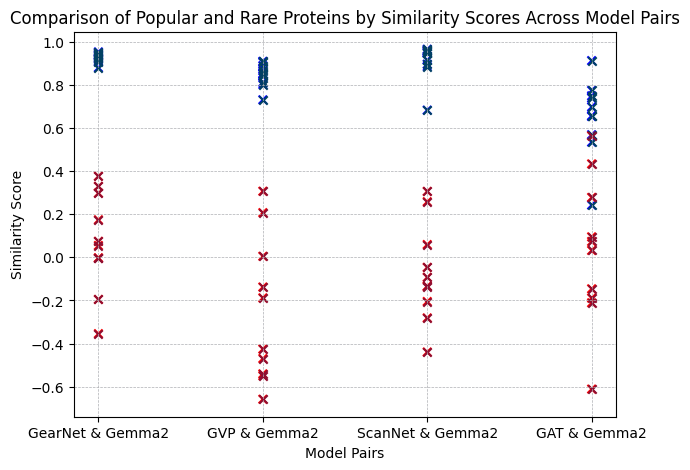

In [39]:
import json
import matplotlib.pyplot as plt

# Load the JSON files
with open("../workspace_data/similarity_scores_gearnet_gemma2.json", "r") as file1, \
     open("../workspace_data/similarity_scores_gvp_gemma2.json", "r") as file2, \
     open("../workspace_data/similarity_scores_scannet_gemma2.json", "r") as file3, \
     open("../workspace_data/similarity_scores_gat_gemma2.json", "r") as file4:
    gearnet_data = json.load(file1)
    gvp_data = json.load(file2)
    scannet_data = json.load(file3)
    gat_data = json.load(file4)

popular_proteins = ["4NWH", "2RAY", "4I8S", "3E3D", "4H8Y", "4H92", "1B1V", "3FE0", "3PYK", "3S9T"]
rare_proteins = ["3I1A", "4Q2G", "4S3K", "3GEU", "3OZQ", "3LOV", "1NVI", "3MGC", "4J77", "2GRM"]
model_pairs = ['GearNet & Gemma2', 'GVP & Gemma2', 'ScanNet & Gemma2', 'GAT & Gemma2']

# Prepare data for plotting
x_vals = []
y_vals = []
colors = []

for protein in popular_proteins + rare_proteins:
    scores = []
    if protein in gearnet_data:
        scores.append(gearnet_data[protein]["similarity_score"])
    if protein in gvp_data:
        scores.append(gvp_data[protein]["similarity_score"])
    if protein in scannet_data:
        scores.append(scannet_data[protein]["similarity_score"])
    if protein in gat_data:
        scores.append(gat_data[protein]["similarity_score"])

    x_vals.extend([i for i in range(len(scores))])
    y_vals.extend(scores)
    
    if protein in popular_proteins:
        colors.extend(['blue'] * len(scores))  # Blue for popular
    else:
        colors.extend(['red'] * len(scores))  # Red for rare

# Adjust the plot based on user's preferences
plt.figure(figsize=(7,5))

# Plot with 'x' markers and specified colors
plt.scatter(x_vals, y_vals, c=colors, marker='x', cmap=None)

# Set custom colors for popular and rare proteins
for i in range(len(x_vals)):
    if colors[i] == 'blue':
        plt.scatter(x_vals[i], y_vals[i], color="#024163", marker='x')  # Custom blue
    else:
        plt.scatter(x_vals[i], y_vals[i], color="#8E0F31", marker='x')  # Custom red

# Adding grid
plt.grid(True, color="#AEAFB3", linestyle='--', linewidth=0.5)

# Update labels and title
plt.xticks(ticks=range(4), labels=model_pairs)
plt.xlabel('Model Pairs')
plt.ylabel('Similarity Score')
plt.title("Comparison of Popular and Rare Proteins by Similarity Scores Across Model Pairs")

# Show the updated plot
plt.show()